#### Simpliest Example with one QPU node and one CPU node in a hybrid cloud. 

In [7]:
# main.py

from HybridCloud import *

PRINTLOG = False
# Devices
ibm_kawasaki = IBM_Kawasaki(env=None, name="QPU-1", printlog = PRINTLOG)
ibm_kyiv = IBM_Kyiv(env=None, name="QPU-2", printlog = PRINTLOG)
cpu1 = CPU("CPU-1", env=None)
cpu2 = CPU("CPU-2", env=None)

# Hybrid environment
sim_env = HybridCloudSimEnv(
    qpu_devices = [ibm_kawasaki, ibm_kyiv],
    cpu_devices = [cpu1, cpu2],
    broker_class = HybridBroker,
    job_feed_method = 'dispatcher',
    file_path = 'synth_job_batches/1000-job.csv', 
    job_generation_model = None, 
    printlog = PRINTLOG
)

sim_env.run()

0.00: SIMULATION STARTED
1097.27: SIMULATION ENDED


In [8]:
# from viz import plot_all

job_records = sim_env.job_records_manager.get_job_records()
# plot_all(job_records)

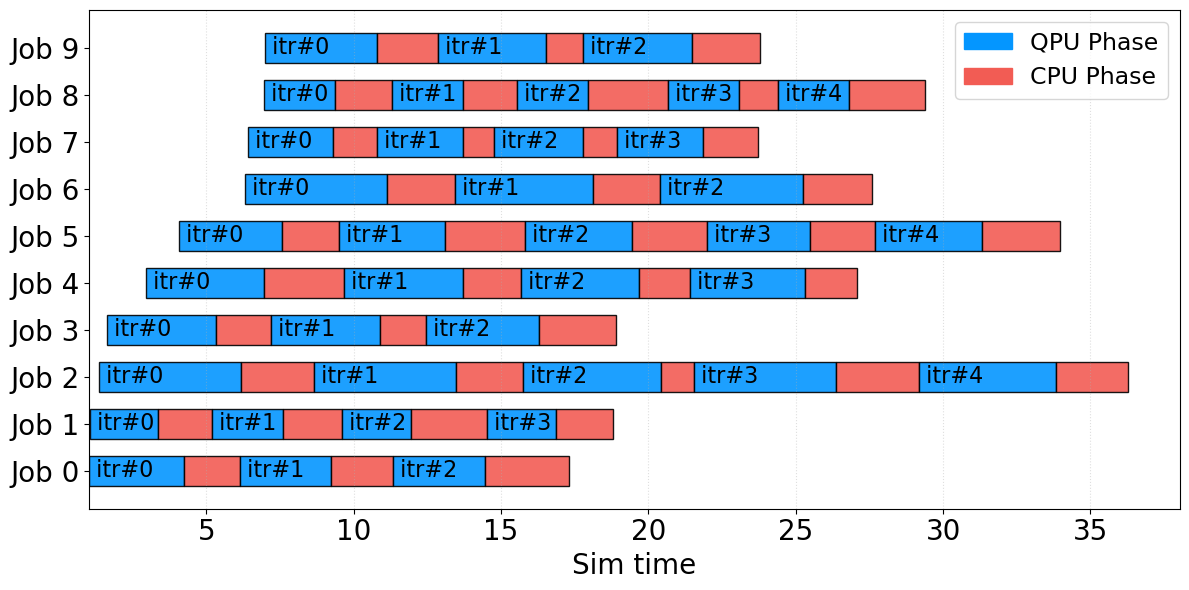

<Figure size 640x480 with 0 Axes>

In [9]:
first_ten = dict(list(job_records.items())[:10])
plot_all(first_ten, 10)
plt.savefig("results/job_phases.png", dpi=300, bbox_inches="tight")

In [10]:
results = calculate_device_usage_units(job_records, sim_env)
print(results)

{'time': 1097.27, 'qpu_util_percent': 78.58, 'cpu_util_percent': 31.62, 'mem_bw_util_percent': 45.12, 'qpu_units_time': 219002.39, 'cpu_units_time': 69383.65, 'mem_bw_time': 198026.87, 'qpu_units_capacity': 254, 'cpu_units_capacity': 200, 'mem_bw_capacity': 400}


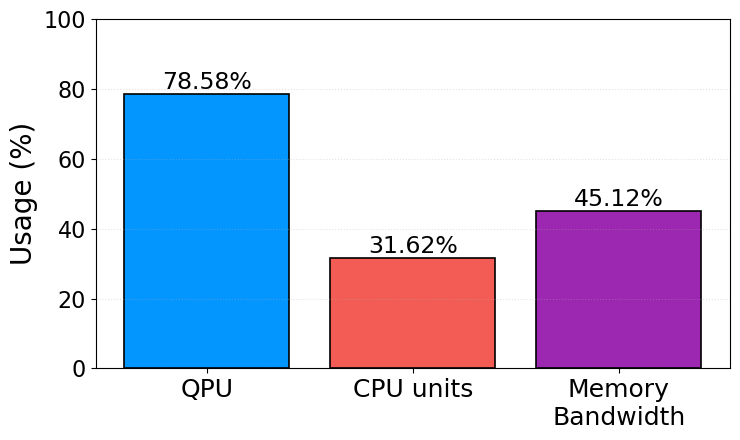

<Figure size 640x480 with 0 Axes>

In [11]:
plot_hybrid_utilization(results)
plt.savefig("results/usage.png", dpi=300, bbox_inches="tight")

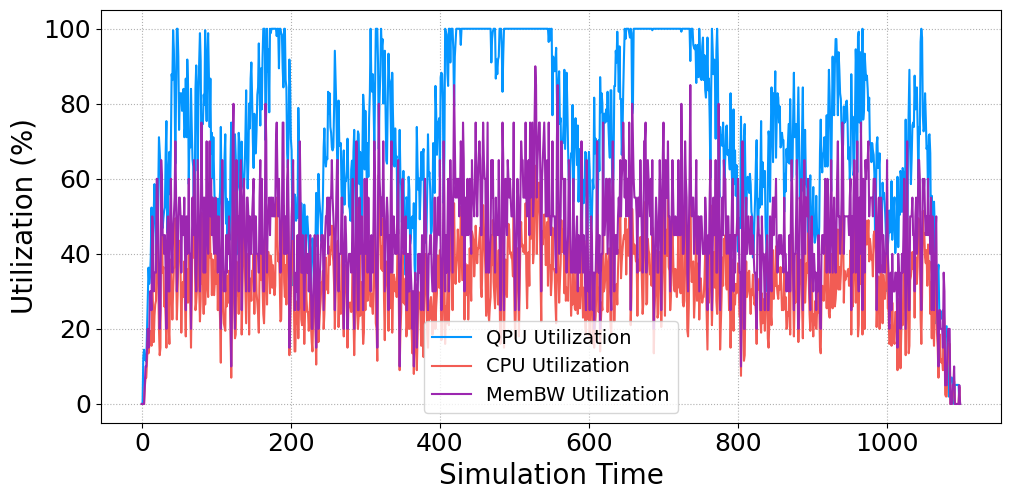

<Figure size 640x480 with 0 Axes>

In [12]:
time_points, qpu_util, cpu_util, mem_util = utilization_time_series(job_records, 256, 200, 400, step = 1.0)
plot_utilization_over_time(time_points, qpu_util, cpu_util, mem_util)
plt.savefig("results/usage_timeline.png", dpi=300, bbox_inches="tight")

In [13]:
job_records

{0: {'arrival': 1.02,
  'qpu_start': [1.0201, 6.1361, 11.3495],
  'devc_name': ['QPU-1', 'CPU-2', 'QPU-2', 'CPU-2', 'QPU-2', 'CPU-2'],
  'qpu_arrive': [1.0201, 6.1361, 11.3495],
  'qpu_units': [6, 6, 6],
  'qpu_finish': [4.2385, 9.2473, 14.4606],
  'cpu_start': [4.2385, 9.2473, 14.4606],
  'cpu_arrive': [4.2385, 9.2473, 14.4606],
  'cpu_units': [5, 10, 5],
  'cpu_mem_bw': [20, 20, 20],
  'cpu_finish': [6.1361, 11.3495, 17.3058]},
 1: {'arrival': 1.05,
  'qpu_start': [1.0454, 5.1965, 9.6054, 14.525],
  'devc_name': ['QPU-2',
   'CPU-1',
   'QPU-1',
   'CPU-1',
   'QPU-2',
   'CPU-2',
   'QPU-2',
   'CPU-1'],
  'qpu_arrive': [1.0454, 5.1965, 9.6054, 14.525],
  'qpu_units': [7, 7, 7, 7],
  'qpu_finish': [3.3787, 7.6103, 11.9387, 16.8583],
  'cpu_start': [3.3787, 7.6103, 11.9387, 16.8583],
  'cpu_arrive': [3.3787, 7.6103, 11.9387, 16.8583],
  'cpu_units': [9, 8, 5, 10],
  'cpu_mem_bw': [20, 20, 20, 20],
  'cpu_finish': [5.1965, 9.6054, 14.525, 18.8122]},
 2: {'arrival': 1.37,
  'qpu_start'